In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing values:

In [8]:
test_data = pd.read_csv(r"D:\Data science\New\test.csv")
train_data = pd.read_csv(r"D:\Data science\New\train.csv")

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train_data.isnull().sum().sum()

866

In [18]:
#Filling missing values for Age:
train_data.fillna(train_data['Age'].median(), inplace = True)
test_data.fillna(test_data['Age'].median(), inplace = True)

In [20]:
#Filling missing values for Embarked:
train_data.fillna(train_data['Embarked'].mode(0), inplace = True)
test_data.fillna(test_data['Embarked'].mode(0), inplace = True)

In [22]:
#Filling missing values for Fare in test dataset:
test_data.fillna(test_data['Fare'].median(), inplace = True)

In [24]:
#Filling missing values for Cabin because too many missing values:
train_data.drop(columns = ['Cabin'], inplace = True)
test_data.drop(columns = ['Cabin'], inplace = True)

In [26]:
train_data.isnull().sum()
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

EDA:

In [35]:
# Descriptive Ananlysis
descriptive_stats = train_data.describe(include='all')
print(descriptive_stats)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

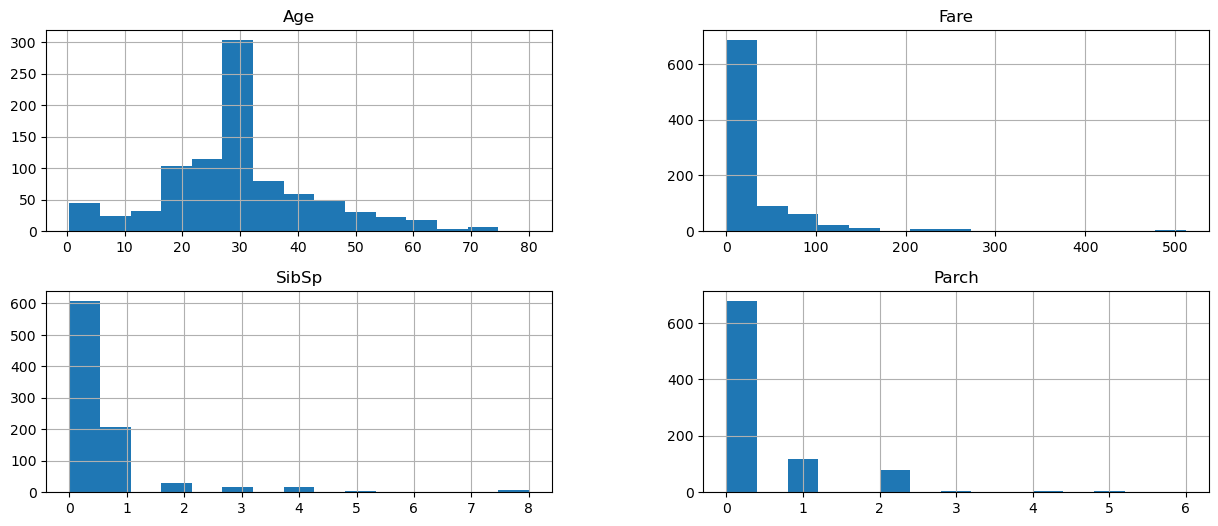

In [33]:
# Univariate Analysis
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
train_data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

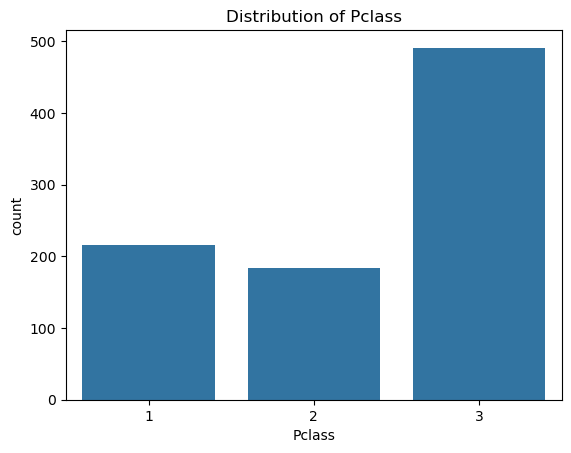

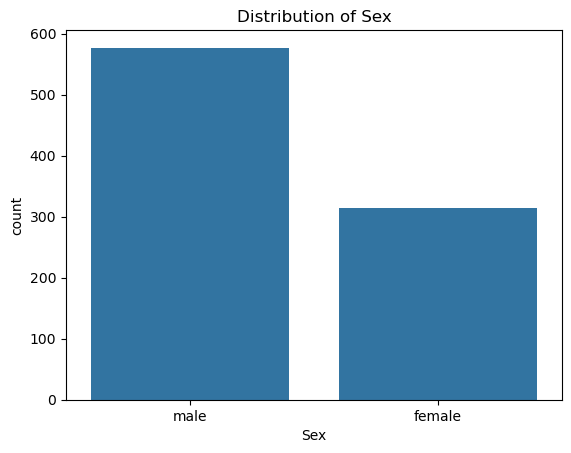

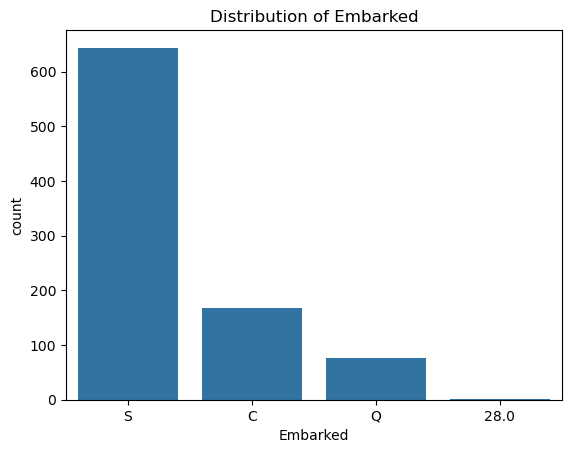

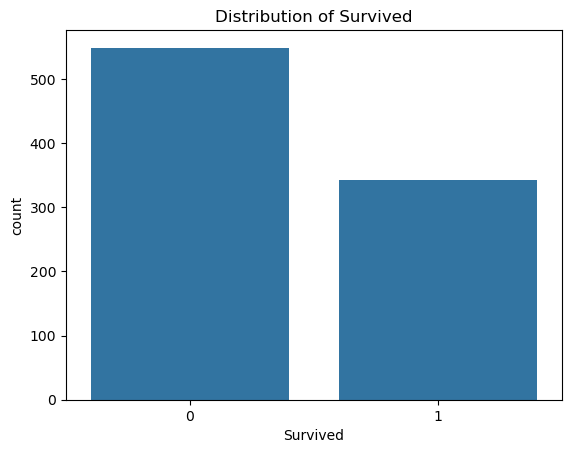

ValueError: Could not interpret value `HasCabin` for `x`. An entry with this name does not appear in `data`.

In [43]:
# Bar charts for categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived', 'HasCabin']
for feature in categorical_features:
    sns.countplot(x=feature, data=train_data)
    plt.title(f'Distribution of {feature}')
    plt.show()

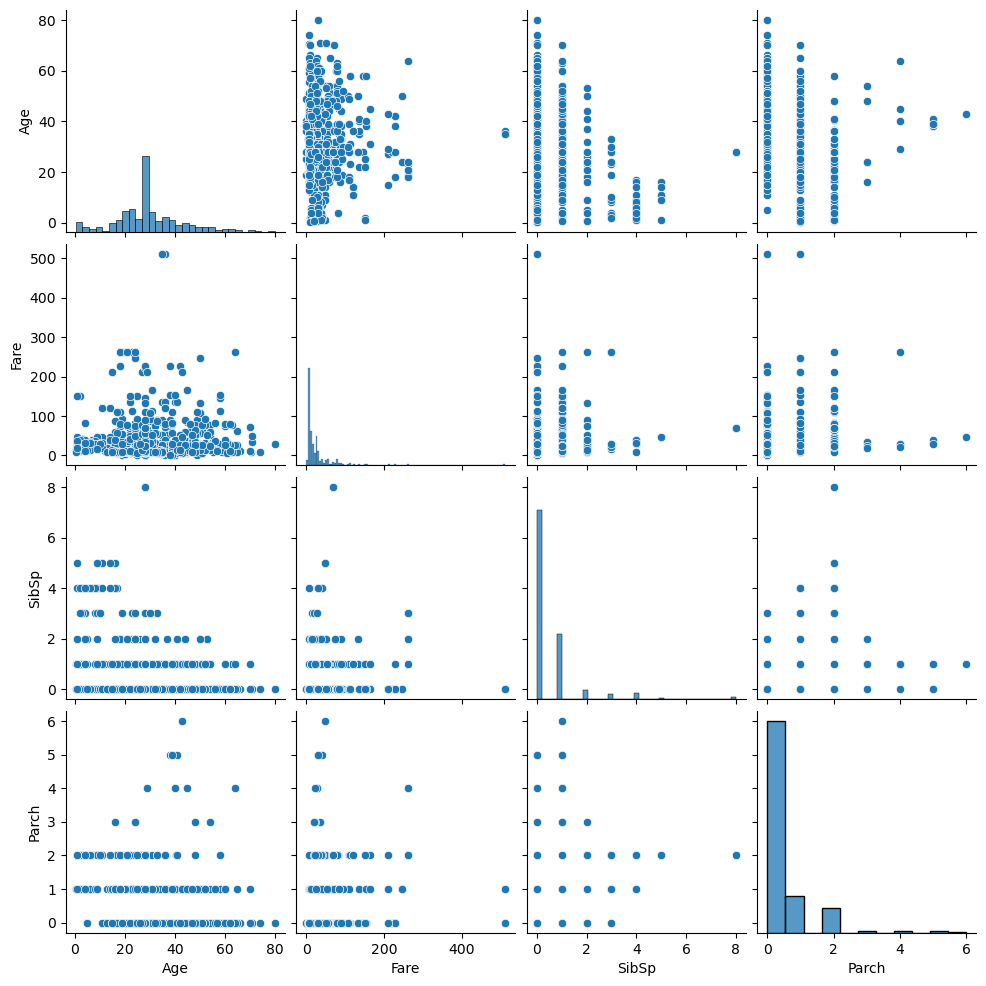

In [47]:
# Bivariate Analysis
sns.pairplot(train_data[numerical_features])
plt.show()

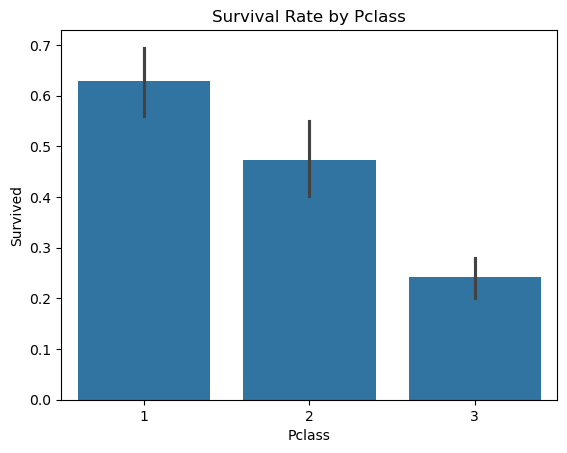

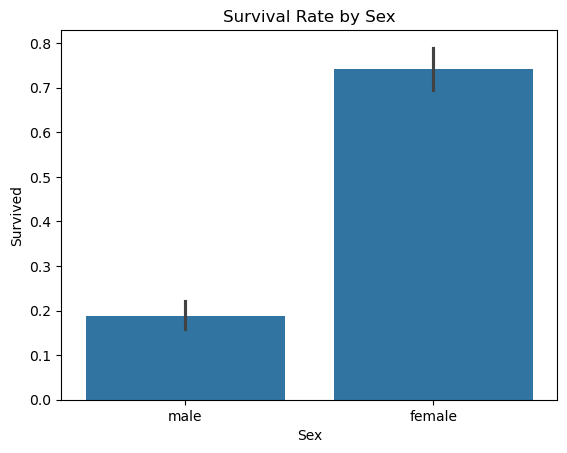

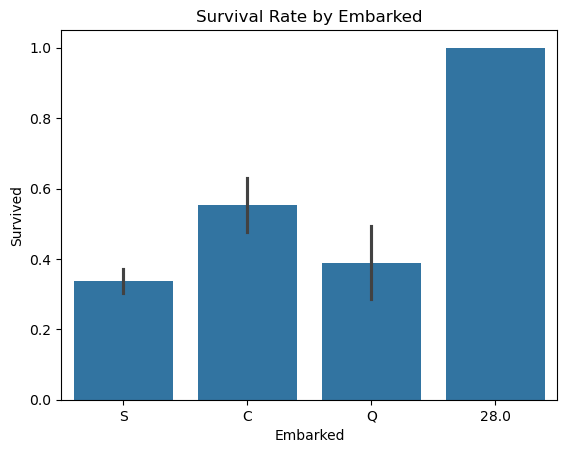

ValueError: Could not interpret value `HasCabin` for `x`. An entry with this name does not appear in `data`.

In [49]:
# Bar charts for relationships between categorical features and 'Survived'
for feature in categorical_features:
    if feature != 'Survived':
        sns.barplot(x=feature, y='Survived', data=train_data)
        plt.title(f'Survival Rate by {feature}')
        plt.show()

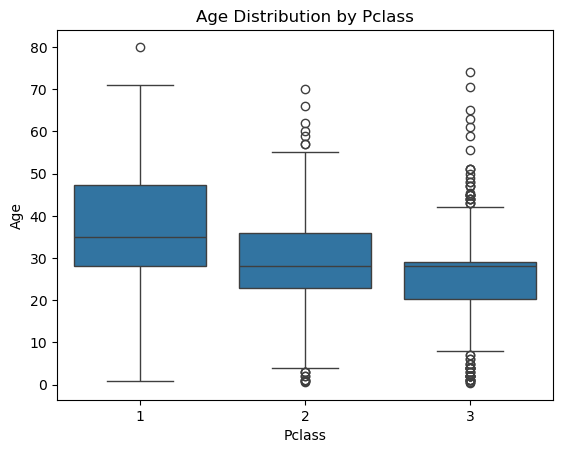

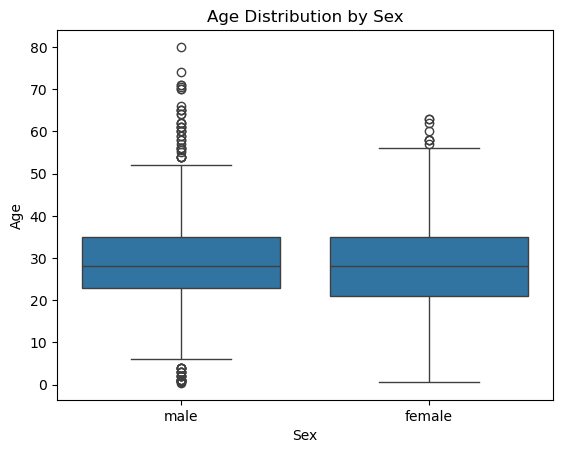

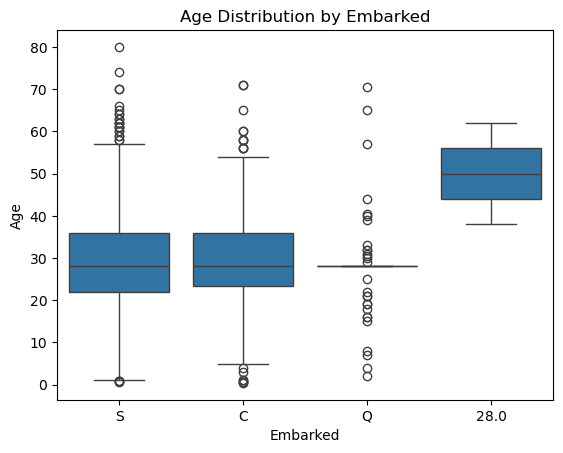

ValueError: Could not interpret value `HasCabin` for `x`. An entry with this name does not appear in `data`.

In [51]:
# Box plots for categorical features and 'Age'
for feature in categorical_features:
    if feature != 'Survived':
        sns.boxplot(x=feature, y='Age', data=train_data)
        plt.title(f'Age Distribution by {feature}')
        plt.show()# Box plots for categorical features and 'Age'
for feature in categorical_features:
    if feature != 'Survived':
        sns.boxplot(x=feature, y='Age', data=train_data)
        plt.title(f'Age Distribution by {feature}')
        plt.show()

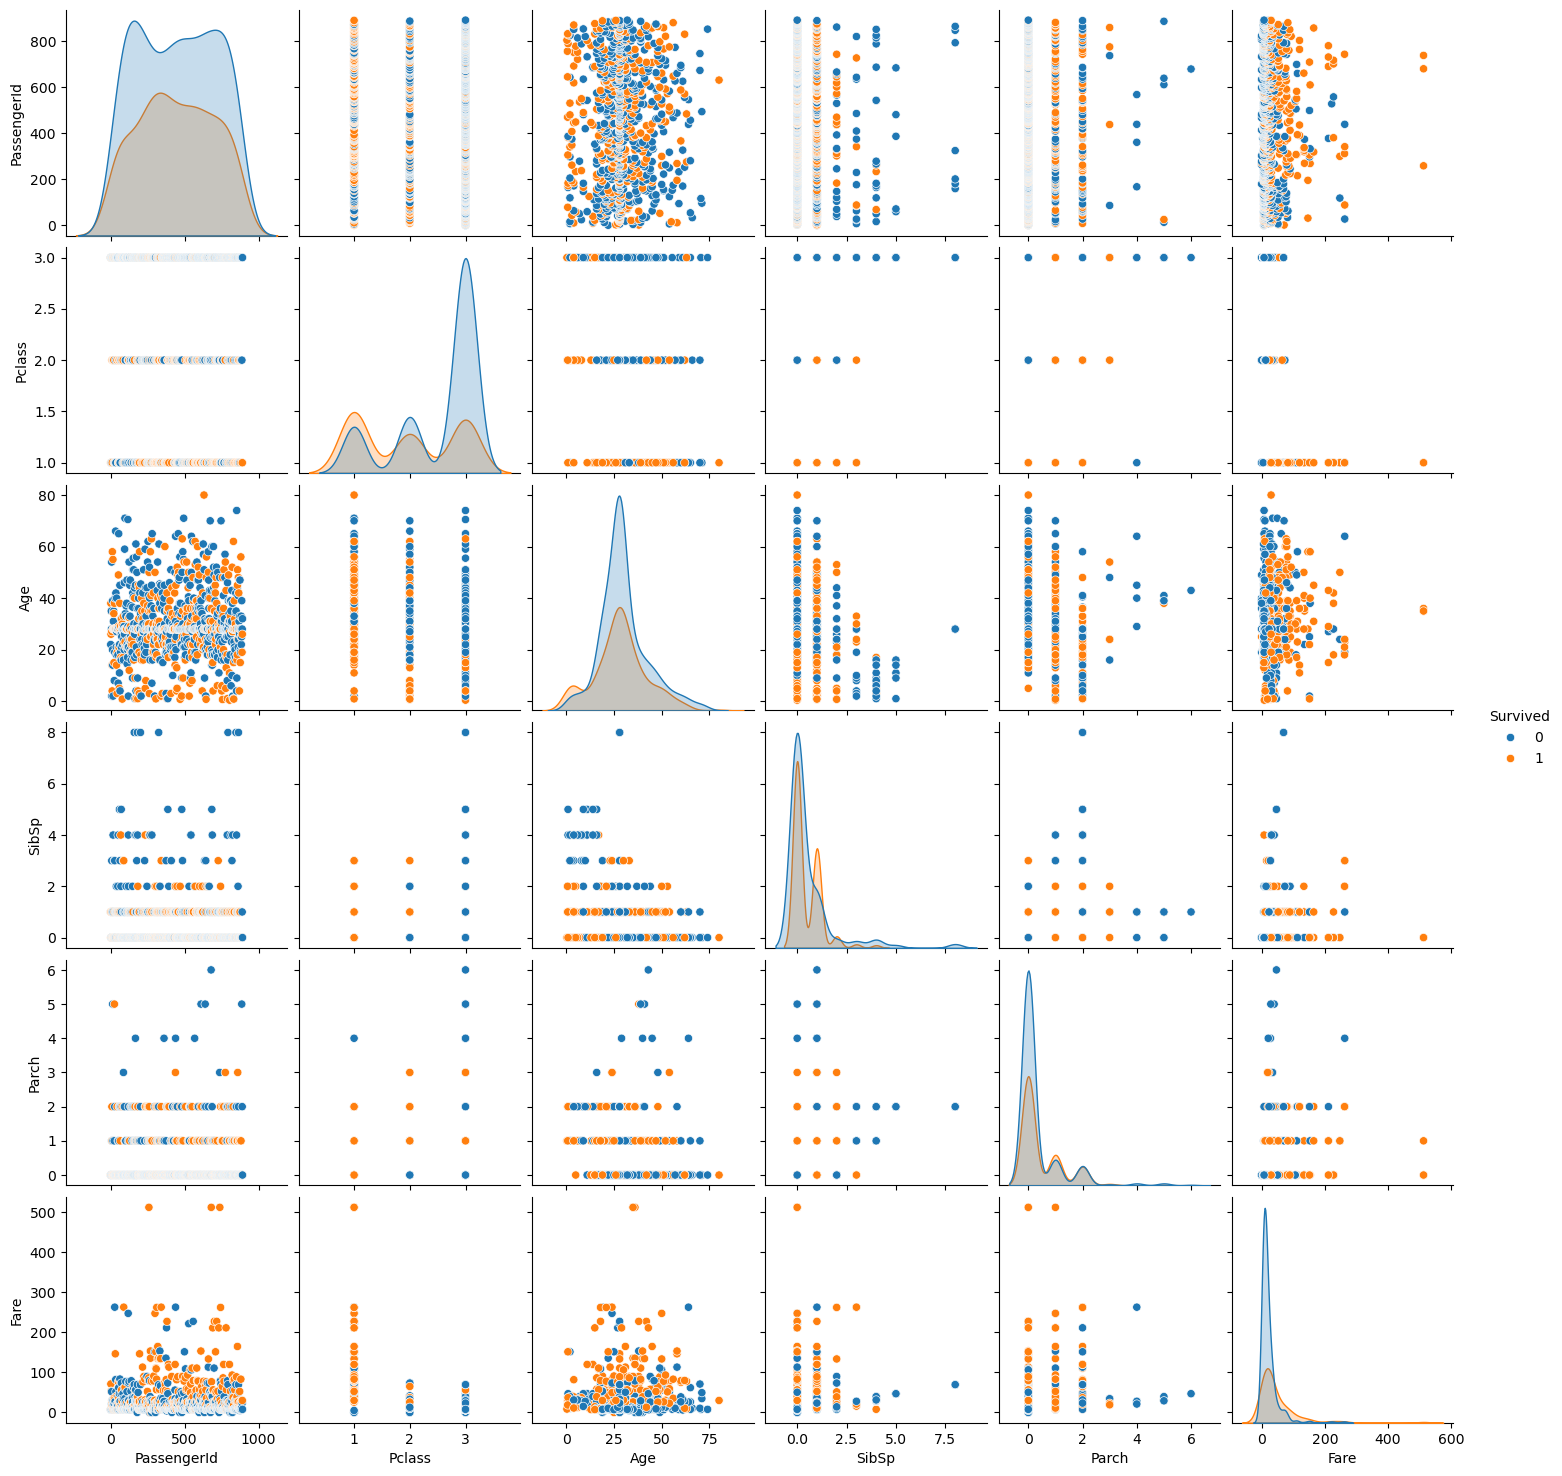

In [53]:
# Multivariate Analysis
sns.pairplot(train_data, hue='Survived')
plt.show()